<a href="https://colab.research.google.com/github/THANHDAT202/CNN/blob/main/CNN_VNfoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from keras.utils import to_categorical


In [ ]:
# Khai báo đường dẫn tới thư mục chứa dữ liệu
data_dir = '/content/drive/MyDrive/BT1/10_Vietnamese dishes'


In [ ]:
# Tạo các tập train, validation và test bằng cách sử dụng ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Chia dữ liệu thành tập train và validation
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Lấy tập train từ tập chia theo validation_split
valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Lấy tập validation từ tập chia theo validation_split
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False) # Không shuffle tập test
  

Found 151 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Found 181 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'Banh_Trung_thu': 0,
 'Banh_chuoi': 1,
 'Banh_gai': 2,
 'Banh_giay': 3,
 'Banh_mi': 4,
 'Banh_trung': 5,
 'Banh_xeo': 6,
 'Goi_cuon': 7,
 'Nem_ran': 8,
 'Pho_bo': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(224,224,3),padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))



#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(train_generator, epochs= 50 , batch_size= 512 ,verbose= 1)
test_loss,test_acc = model.evaluate(train_generator)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)



Epoch 1/50
5/5 [==============================] - 31s 6s/step - loss: 2.9082 - accuracy: 0.1589
Epoch 2/50
5/5 [==============================] - 29s 5s/step - loss: 2.2541 - accuracy: 0.1656
Epoch 3/50
5/5 [==============================] - 29s 5s/step - loss: 1.8414 - accuracy: 0.3444
Epoch 4/50
5/5 [==============================] - 29s 5s/step - loss: 1.4007 - accuracy: 0.4901
Epoch 5/50
5/5 [==============================] - 29s 6s/step - loss: 1.0718 - accuracy: 0.6225
Epoch 6/50
5/5 [==============================] - 30s 5s/step - loss: 0.8966 - accuracy: 0.6821
Epoch 7/50
5/5 [==============================] - 30s 6s/step - loss: 0.8367 - accuracy: 0.7020
Epoch 8/50
5/5 [==============================] - 30s 6s/step - loss: 0.7031 - accuracy: 0.7550
Epoch 9/50
5/5 [==============================] - 30s 6s/step - loss: 0.5762 - accuracy: 0.8079
Epoch 10/50
5/5 [==============================] - 30s 6s/step - loss: 0.3375 - accuracy: 0.8808
Epoch 11/50
5/5 [======================

In [ ]:
#lưu
from keras.models import load_model
model.save("VNfoods(CNN).h5")
model_1=load_model('VNfoods(CNN).h5')


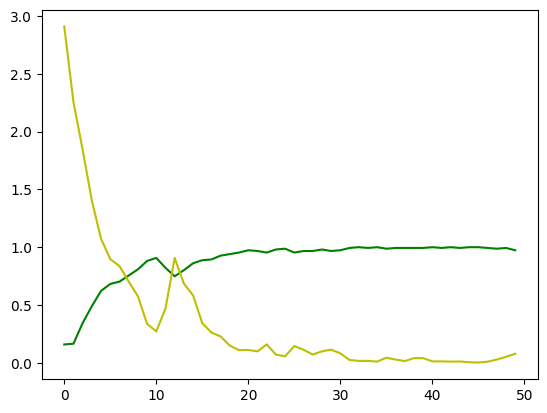

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()


Saving f3.jpg to f3.jpg
1/1 [==============================] - 0s 74ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  Banh xèo


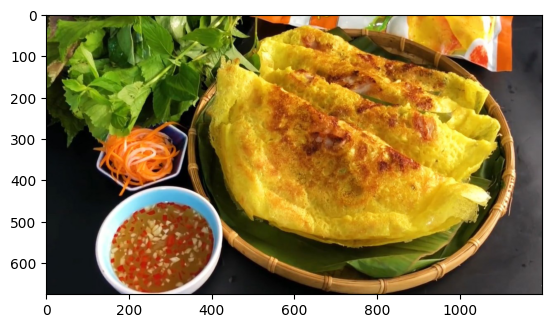

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=load_img(path,target_size=(224,224))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  label=['Banh Trung thu',
 'Banh chuối',
 'Banh gai',
 'Banh giày',
 'Banh mì',
 'Banh trung',
 'Banh xèo',
 'Gỏi cuối',
 'Nem rán',
 'Phở bò']
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])